In [41]:
import glob
import os
import shutil

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

move_path = '/private/home/zizhao/work/checkpoint_fmri/mri_session_exp/'

def draw_curve2(fig, data, color, label, pdfsavepath=None):
    global Percentage
    # for discriminator score
#     fig = plt.figure(figsize=(15,10))
    plt.tick_params(labelsize=25)
    fig.add_subplot(111)
    # x = np.arange(data.shape[0])
    xval = [float(a)/data.shape[0] * Percentage[-1] for a in range(1, data.shape[0]+1)]
    plt.plot(xval, data[:,0], color=color, label=label, linewidth=5)
    plt.fill_between(xval, data[:,0]-data[:,1], data[:,0]+data[:,1],
                    alpha=0.2, edgecolor='#FFFFFF', facecolor=color)
    plt.ylabel('Discriminator U. score', fontsize=40)
    plt.xlabel('kMA (%)', fontsize=40)
    # plt.title('avgerage reconstruced k-space D-score', fontsize=30)
    plt.legend(fontsize=25)

    
    if pdfsavepath is not None:
        plt.savefig(pdfsavepath)
    fig.tight_layout()
    fig.canvas.draw()

    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return data


/private/home/zizhao/.conda/envs/zzfair/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/private/home/zizhao/.conda/envs/zzfair/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


<Figure size 720x720 with 0 Axes>

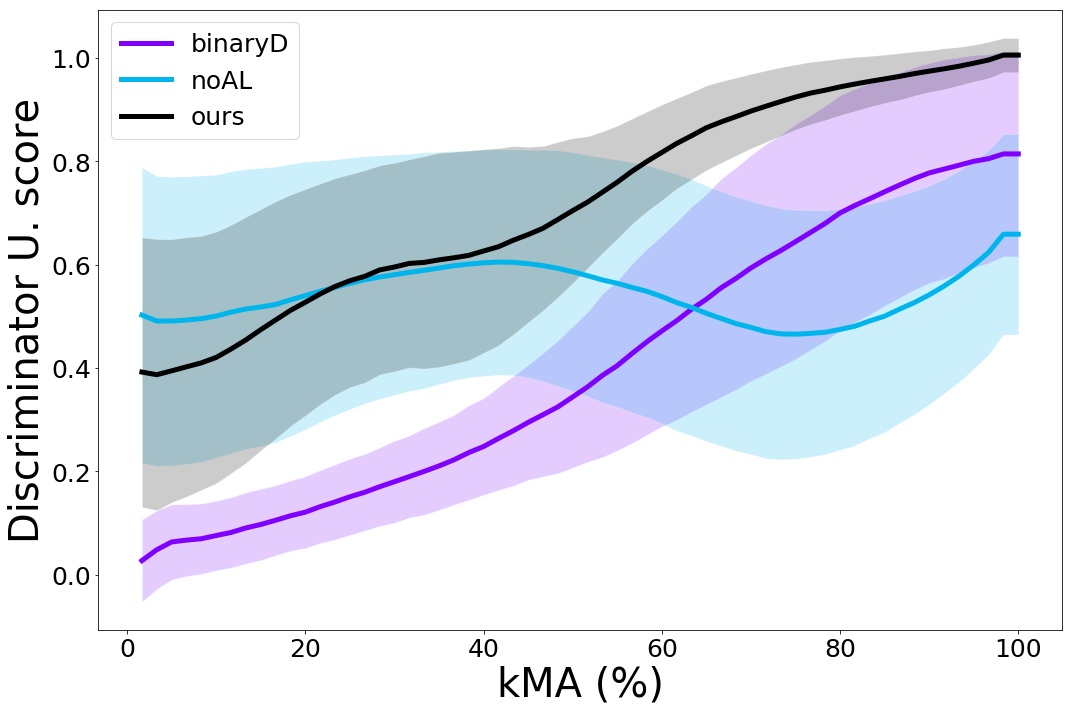

In [42]:
methods = { 
    'binaryD': os.path.join(move_path, 'knee_pasgan_uncertainty_w113_logvar_maskmetacond_0.1gan'),
    'noAL': os.path.join(move_path, 'knee_energynet_pasnetplus_w111logvar_gradctx_pxlm_ablation'),
     'ours': os.path.join(move_path, 'knee_energypasnetplus_w111logvar_0.1gan_gradctx_pxlm'),
}
fig = plt.figure(figsize=(10,10))

fig = plt.figure(figsize=(15,10))
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 5))
for i, (method, path) in enumerate(methods.items()):
    metadata = pickle.load(open(os.path.join(path, 'test_recommend_latest/images/metadata1.pickle'), 'rb'))
    Percentage = metadata['Percentage']
    draw_curve2(fig, metadata['score_D'], color=colors[i] if method != 'ours' else 'black', label=method)

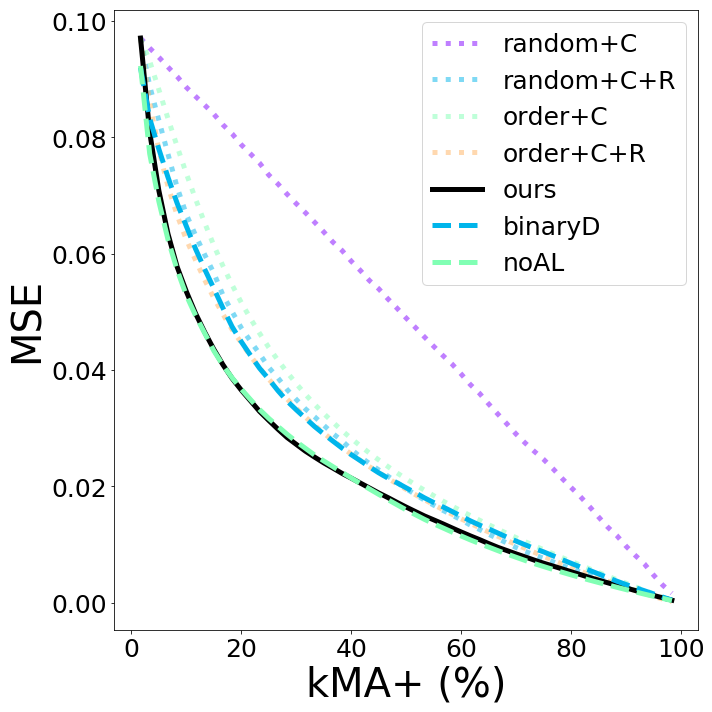

In [36]:
methods = { 
    'ours': os.path.join(move_path, 'knee_energypasnetplus_w111logvar_0.1gan_gradctx_pxlm'),
    'binaryD': os.path.join(move_path, 'knee_pasgan_uncertainty_w113_logvar_maskmetacond_0.1gan'),
    'noAL': os.path.join(move_path, 'knee_energynet_pasnetplus_w111logvar_gradctx_pxlm_ablation'),
    'ours': os.path.join(move_path, 'knee_energypasnetplus_w111logvar_0.1gan_gradctx_pxlm'),
}
tot = -1
file_path = 'test_recommend_latest/images/metadata1.pickle'
fig = plt.figure(figsize=(10,10))
for i, (method_name, method) in enumerate(methods.items()):
    cur_file_path = os.path.join(move_path, method, file_path)
    MetaData = pickle.load(open(cur_file_path, 'rb'))
    Percentage = MetaData['Percentage']
    if i == 0:
        for s, (key, values) in enumerate(MetaData['score'].items()):
            color = 'black' if 'ours' in key else colors[s]
            ls = '-' if 'ours' in key else ":"
            alpha = 1 if 'ours' in key else 0.5
            key_name = method_name if 'ours' in key else key.replace('_', '+')
            xval = [float(a)/values.shape[0] * Percentage[-1] for a in range(1, values.shape[0]+1)]
            plt.plot(xval[:tot], values[:tot,0], color=color, label=key_name, linewidth=5, linestyle=ls, alpha=alpha)
    else:
        values = MetaData['score']['ours_C_R'] if 'ours_C_R' in MetaData['score'].keys() else  MetaData['score']['algorithm_C_R']
        ls = '--' 
        color = colors[i]
#         if i == 0: color = 'black'
        key_name = method_name.replace('_', '+')
        xval = [float(a)/values.shape[0] * Percentage[-1] for a in range(1, values.shape[0]+1)]
        plt.plot(xval[:tot], values[:tot,0], color=color, label=key_name, linewidth=5, linestyle=ls)


plt.ylabel('MSE', fontsize=40)
plt.xlabel('kMA+ (%)', fontsize=40)
plt.legend(fontsize=25)
plt.tick_params(labelsize=25)
fig.tight_layout()
fig.canvas.draw()

In [ ]:
|